## Tables and Figures Rey (2016)

**Rey, S.J. (2016) “Space-time patterns of rank concordance: Local indicators of mobility association with applications to spatial income inequality dynamics.” *Annals of the Association of American Geographers.* DOI [10.1080/24694452.2016.1151336](http://dx.doi.org/10.1080/24694452.2016.1151336)**

This notebook reproduces the following

* Figure 5

Note that the values and figures produced here were then incorporated into the main LaTeX file for submission. In some cases the column/row labels were editted prior to production. All numerical results, however, were as produced by this script.




In [1]:
%pylab inline
import numpy as np
import pysal as ps

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 8.5

top01 = np.loadtxt('top01.dat')
top10 = np.loadtxt('top10.dat')
abbreviations = np.loadtxt('ab48.dat', dtype='str').tolist()
dbf = ps.open(ps.examples.get_path("us48.dbf"))
psab = np.array(dbf.by_col('STATE_ABBR')).tolist()
order = np.array([abbreviations.index(ab) for ab in psab])
top01 = top01[order]
top10 = top10[order]

In [3]:
shp_path = "mexicojoin.shp"
dbf_path = "mexicojoin.dbf"

In [4]:
dbf = ps.open(dbf_path)
dbf.header
var_names = ["PCGDP%d"%year for year in range(1940,2010, 10) ]
print dbf.header
pcgdp = np.array([dbf.by_col(v) for v in var_names]).T

rpcgdp = pcgdp/pcgdp.mean(axis=0)

[u'POLY_ID', u'AREA', u'CODE', u'NAME', u'PERIMETER', u'ACRES', u'HECTARES', u'PCGDP1940', u'PCGDP1950', u'PCGDP1960', u'PCGDP1970', u'PCGDP1980', u'PCGDP1990', u'PCGDP2000', u'HANSON03', u'HANSON98', u'ESQUIVEL99', u'INEGI', u'INEGI2', u'MAXP', u'GR4000', u'GR5000', u'GR6000', u'GR7000', u'GR8000', u'GR9000', u'LPCGDP40', u'LPCGDP50', u'LPCGDP60', u'LPCGDP70', u'LPCGDP80', u'LPCGDP90', u'LPCGDP00', u'TEST']


In [5]:
rpcgdp[:,0]

array([ 3.09258051,  1.32396911,  0.66883052,  0.73424757,  1.43613237,
        0.60286027,  1.5235395 ,  0.6104669 ,  0.46013217,  0.47133466,
        2.46399599,  0.95553145,  0.95926561,  1.10503637,  0.51974051,
        0.49360135,  3.03781275,  0.49858024,  0.30163759,  0.26166819,
        0.34008566,  0.40577931,  0.88499721,  1.18635819,  1.1806878 ,
        0.66938373,  1.67788501,  0.51642125,  0.6046582 ,  1.25481789,
        1.0383746 ,  0.71958751])

In [6]:
from scipy.stats import rankdata as RANKDATA

In [7]:
ranks = np.asarray([RANKDATA(y) for y in rpcgdp.T]).T

In [8]:
ranks[:,0]

array([ 32.,  26.,  14.,  17.,  27.,  11.,  28.,  13.,   5.,   6.,  30.,
        19.,  20.,  22.,  10.,   7.,  31.,   8.,   2.,   1.,   3.,   4.,
        18.,  24.,  23.,  15.,  29.,   9.,  12.,  25.,  21.,  16.])

In [9]:
ranks[:,-1]

array([ 27.,  23.,   4.,  20.,  25.,  12.,  24.,   9.,   7.,  15.,  32.,
        19.,  18.,  17.,  30.,  13.,  29.,   5.,   6.,   2.,  10.,   1.,
        22.,  28.,  26.,  11.,  16.,   3.,  14.,  31.,  21.,   8.])

In [10]:
dranks = ranks[:,1:] - ranks[:,:-1]

In [11]:
cumd = dranks.sum(axis=1)

In [12]:
cumd

array([ -5.,  -3., -10.,   3.,  -2.,   1.,  -4.,  -4.,   2.,   9.,   2.,
         0.,  -2.,  -5.,  20.,   6.,  -2.,  -3.,   4.,   1.,   7.,  -3.,
         4.,   4.,   3.,  -4., -13.,  -6.,   2.,   6.,   0.,  -8.])

In [13]:
epd = ranks[:,-1] - ranks[:,0]

In [14]:
epd

array([ -5.,  -3., -10.,   3.,  -2.,   1.,  -4.,  -4.,   2.,   9.,   2.,
         0.,  -2.,  -5.,  20.,   6.,  -2.,  -3.,   4.,   1.,   7.,  -3.,
         4.,   4.,   3.,  -4., -13.,  -6.,   2.,   6.,   0.,  -8.])

In [15]:
cumd[0] # cumulative sum and endpoint change will be identical

-5.0

In [16]:
dranks

array([[ -1.,  -1.,   0.,  -1.,   0.,  -2.],
       [  3.,   0.,   0.,  -1.,  -1.,  -4.],
       [  3.,  -3.,  -2.,  -3.,  -1.,  -4.],
       [  2.,   3.,   0.,  -1.,   0.,  -1.],
       [-14.,   4.,   4.,   1.,   0.,   3.],
       [  0.,   4.,  -2.,  -2.,  -1.,   2.],
       [-18.,   3.,   6.,   0.,   4.,   1.],
       [ -5.,   1.,  -3.,   1.,   2.,   0.],
       [  4.,  -5.,   3.,  -2.,   0.,   2.],
       [  1.,  11.,   7.,  -5.,  -1.,  -4.],
       [  0.,   2.,   0.,  -1.,   0.,   1.],
       [ -7.,  -4.,   8.,   2.,   0.,   1.],
       [  3.,   1.,  -6.,  -2.,   1.,   1.],
       [ -2.,   3.,  -9.,  -1.,  -1.,   5.],
       [ -4.,   1.,   4.,  -5.,  26.,  -2.],
       [  7.,  -2.,  -2.,   0.,  -3.,   6.],
       [  1., -11.,   2.,   4.,  -2.,   4.],
       [ -4.,  -2.,   0.,   2.,   0.,   1.],
       [ -1.,   2.,   0.,  -1.,   1.,   3.],
       [  4.,  -4.,   0.,   0.,   0.,   1.],
       [ -1.,   9.,  -3.,  24., -17.,  -5.],
       [ -1.,   2.,  -1.,  11., -13.,  -1.],
       [  

In [17]:
cumad = np.abs(dranks).sum(axis=1)
cumad

array([  5.,   9.,  16.,   7.,  26.,  11.,  32.,  12.,  16.,  29.,   4.,
        22.,  14.,  21.,  42.,  20.,  24.,   9.,   8.,   9.,  59.,  29.,
        16.,  10.,   9.,  14.,  13.,  24.,  22.,   8.,  18.,  26.])

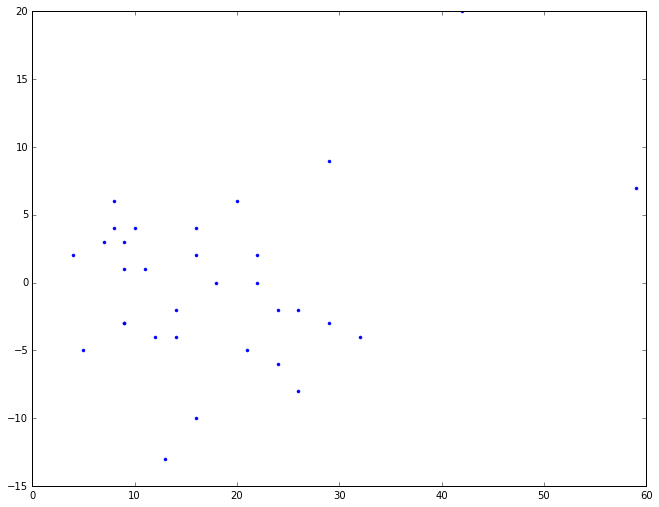

In [18]:
plot(cumad, epd, '.')

In [19]:
bins_epd = ps.Quantiles(epd, k=5)

In [20]:
bins_epd

               Quantiles               
 
Lower            Upper            Count
         x[i] <= -4.000               9
-4.000 < x[i] <= -2.000               6
-2.000 < x[i] <=  1.600               4
 1.600 < x[i] <=  4.000               8
 4.000 < x[i] <= 20.000               5

In [21]:
rpcgdp.mean(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [22]:
bins_5 = np.array([ps.Quantiles(g, k=5).yb for g in pcgdp.T])

r_5 = [ps.Quantiles(g, k=5) for g in rpcgdp.T]

In [23]:
bins_5

array([[4, 4, 2, 2, 4, 1, 4, 1, 0, 0, 4, 2, 3, 3, 1, 0, 4, 1, 0, 0, 0, 0,
        2, 3, 3, 2, 4, 1, 1, 3, 3, 2],
       [4, 4, 2, 2, 1, 1, 1, 1, 1, 0, 4, 1, 3, 3, 0, 2, 4, 0, 0, 0, 0, 0,
        4, 4, 3, 2, 3, 2, 2, 4, 3, 3],
       [4, 4, 2, 3, 2, 2, 1, 1, 0, 2, 4, 1, 3, 3, 0, 1, 3, 0, 0, 0, 1, 0,
        4, 4, 4, 3, 2, 0, 1, 4, 2, 3],
       [4, 4, 1, 3, 3, 1, 2, 0, 0, 3, 4, 2, 2, 2, 1, 1, 3, 0, 0, 0, 1, 0,
        4, 4, 4, 3, 2, 0, 1, 4, 3, 2],
       [4, 4, 1, 3, 3, 1, 2, 0, 0, 3, 4, 2, 2, 1, 0, 1, 4, 0, 0, 0, 4, 2,
        3, 3, 4, 2, 2, 0, 1, 4, 3, 1],
       [4, 4, 1, 3, 3, 1, 3, 1, 0, 2, 4, 2, 2, 1, 4, 0, 3, 0, 0, 0, 2, 0,
        3, 4, 4, 2, 2, 0, 1, 4, 3, 1],
       [4, 3, 0, 3, 3, 1, 3, 1, 0, 2, 4, 2, 2, 2, 4, 1, 4, 0, 0, 0, 1, 0,
        3, 4, 4, 1, 2, 0, 2, 4, 3, 1]])

In [24]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


In [25]:

reader = shpreader.Reader(ps.examples.get_path("us48.shp"))
reader = shpreader.Reader(shp_path)

ax = plt.axes([0,0,1,1], projection=ccrs.LambertConformal())
ax.set_extent([-118, -86.5, 32, 14], ccrs.Geodetic())
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
plt.title("Year Here")
for state in reader.geometries():
    facecolor = [0.9375, 0.9375, 0.859375]
    edgecolor = 'black'
    ax.add_geometries([state], ccrs.PlateCarree(), 
                     facecolor=facecolor, edgecolor=edgecolor)
plt.show()

In [26]:
bwr = plt.cm.get_cmap('bwr')
bwr(.76)
c5 = [bwr(c) for c in [0.2, 0.4, 0.6, 0.7, 1.0]]
c5

[(0.40000000000000002, 0.40000000000000002, 1.0, 1.0),
 (0.80000000000000004, 0.80000000000000004, 1.0, 1.0),
 (1.0, 0.80000000000000004, 0.80000000000000004, 1.0),
 (1.0, 0.59607843137254901, 0.59607843137254901, 1.0),
 (1.0, 0.0, 0.0, 1.0)]

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


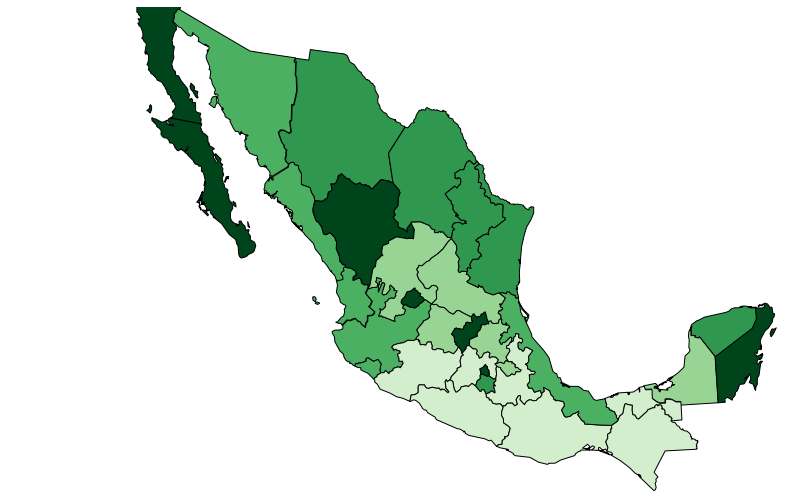

In [27]:

def choropleth(classes, colors, reader, legend=None, title=None, fileName=None, dpi=600):
    ax = plt.axes([0,0,1,1], projection=ccrs.LambertConformal())
    ax.set_extent([-118, -86.5, 32, 14], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    if title:
        plt.title(title)
    ax.set_extent([-118, -86.5, 32, 14], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    
    for i,state in enumerate(reader.geometries()):
        facecolor = colors[classes[i]]
        #facecolor = 'red'
        edgecolor = 'black'
        ax.add_geometries([state], ccrs.PlateCarree(), 
                         facecolor=facecolor, edgecolor=edgecolor)
        
    leg = [ mpatches.Rectangle((0,0),1,1, facecolor=color) for color in colors]
    if legend:
        plt.legend(leg, legend, loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)
    if fileName:
        plt.savefig(fileName, dpi=dpi)
    plt.show()
   
    
facecolors = ['blue','green','yellow','orange','red']
facecolors = [ '#f7f7f7', '#cccccc', '#969696', '#636363', '#252525']
facecolors = [ '#fee5d9', '#fcae91', '#fb6a4a', '#de2d26', '#a50f15']


classes = np.random.random_integers(0,4,48)
legend=[ "Q%d"%i for i in range(1,6)]
#legend =[ "%3.2f"%ub for ub in bins_5 ]
legend =[ "%d"%ub for ub in bins_5[0] ]
classes = bins_5[0]
bwr = plt.cm.get_cmap('Greens')
bwr(.76)
c5 = [bwr(c) for c in [0.2, 0.4, 0.6, 0.7, 1.0]]
choropleth(classes,c5,reader)

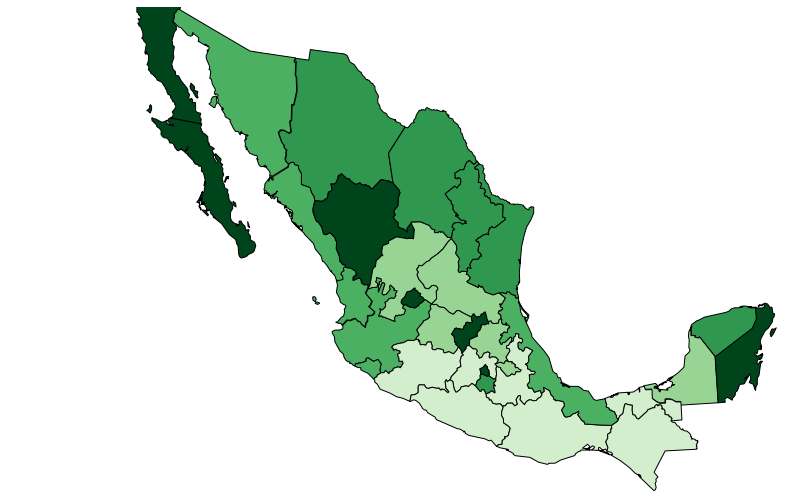

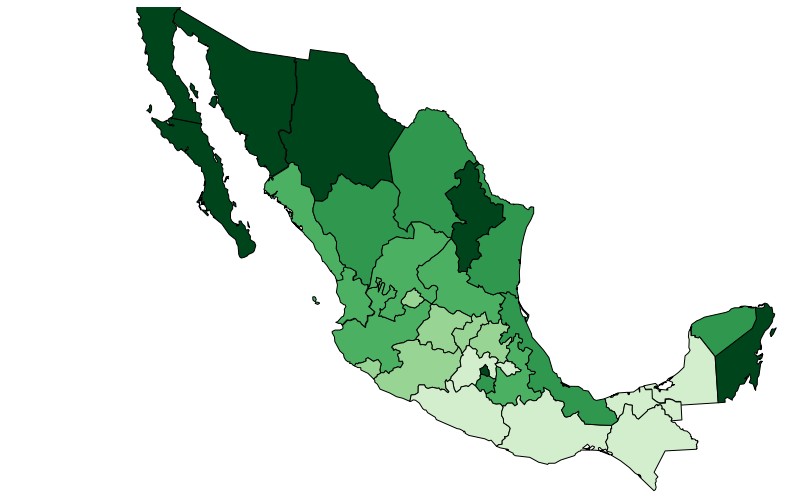

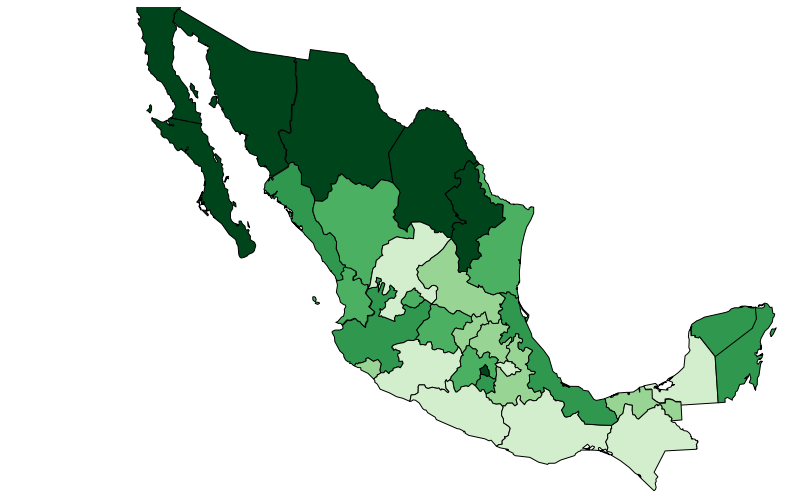

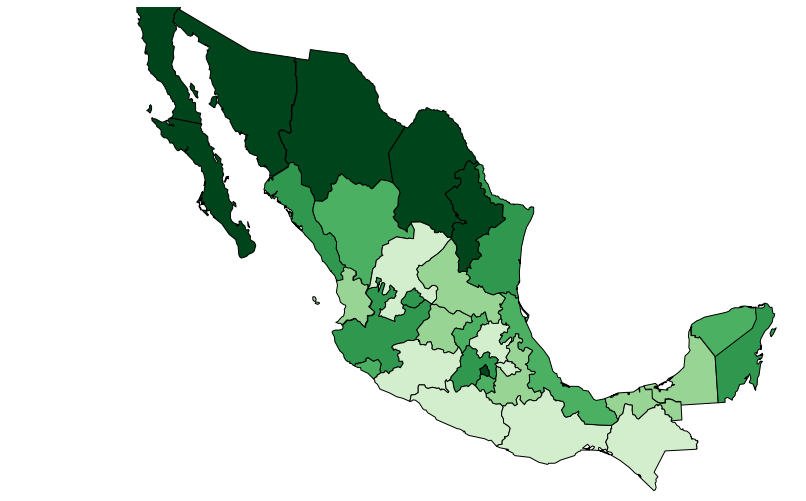

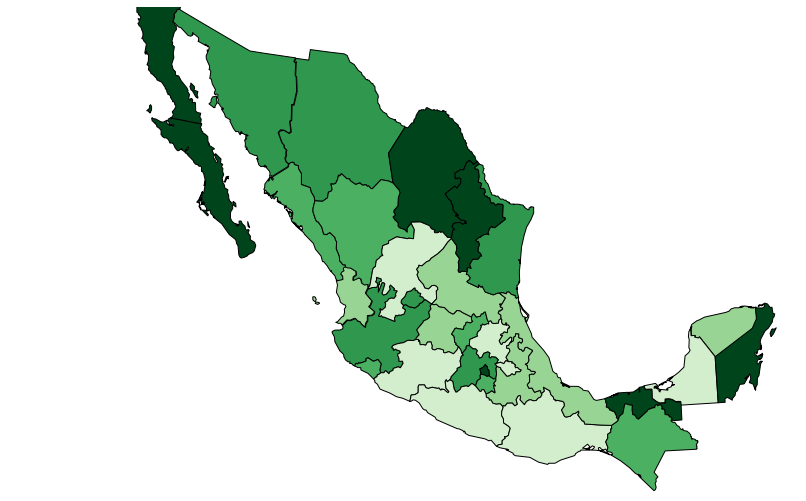

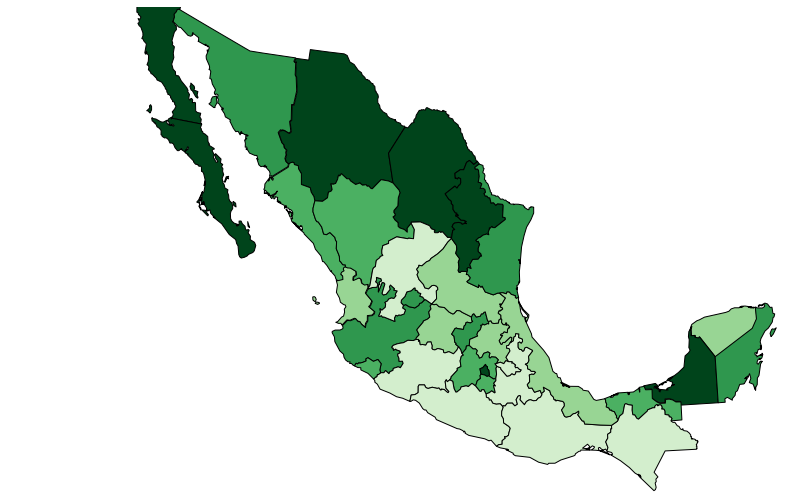

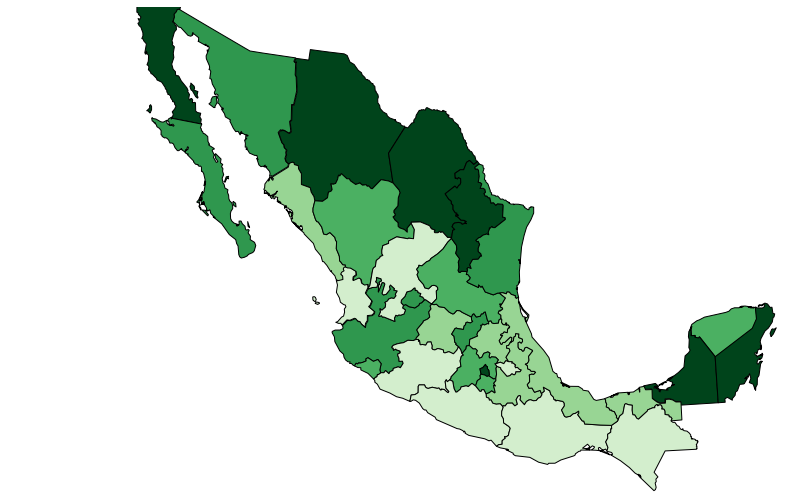

In [28]:
for classes in bins_5:
    choropleth(classes,c5,reader)

In [29]:
bins_epd

               Quantiles               
 
Lower            Upper            Count
         x[i] <= -4.000               9
-4.000 < x[i] <= -2.000               6
-2.000 < x[i] <=  1.600               4
 1.600 < x[i] <=  4.000               8
 4.000 < x[i] <= 20.000               5

In [30]:
epd

array([ -5.,  -3., -10.,   3.,  -2.,   1.,  -4.,  -4.,   2.,   9.,   2.,
         0.,  -2.,  -5.,  20.,   6.,  -2.,  -3.,   4.,   1.,   7.,  -3.,
         4.,   4.,   3.,  -4., -13.,  -6.,   2.,   6.,   0.,  -8.])

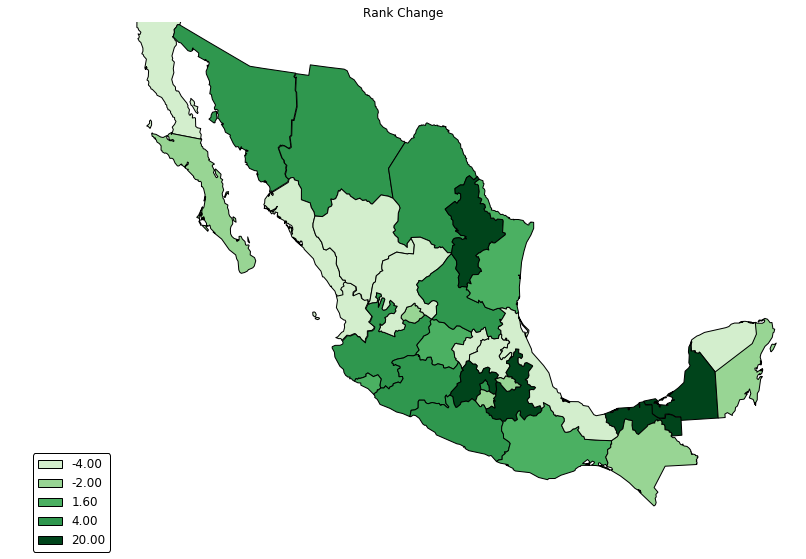

In [31]:
legend =[ "%3.2f"%ub for ub in bins_epd.bins]
classes = bins_epd.yb
fn = "epd.png"
choropleth(classes,c5,reader,  legend,title = "Rank Change", fileName=fn, dpi=300)

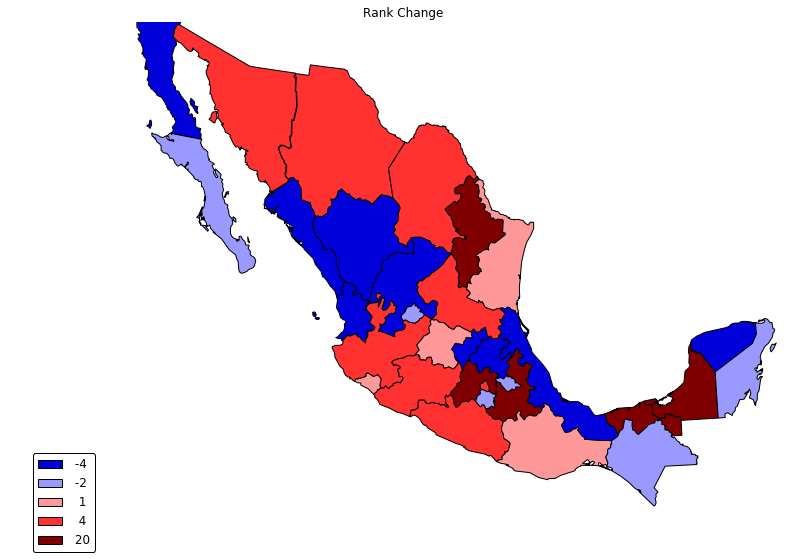

In [32]:
bwr = plt.cm.get_cmap('seismic')
bwr(.76)
c5 = [bwr(c) for c in [0.2, 0.4, 0.6, 0.7, 1.0]]

legend =[ "%3d"%ub for ub in bins_epd.bins]
classes = bins_epd.yb
fn = "epd.png"
colors = ['blue', 'cyan', 'white', 'red', 'orange']
choropleth(classes,c5,reader,  legend,title = "Rank Change", fileName=fn, dpi=300)

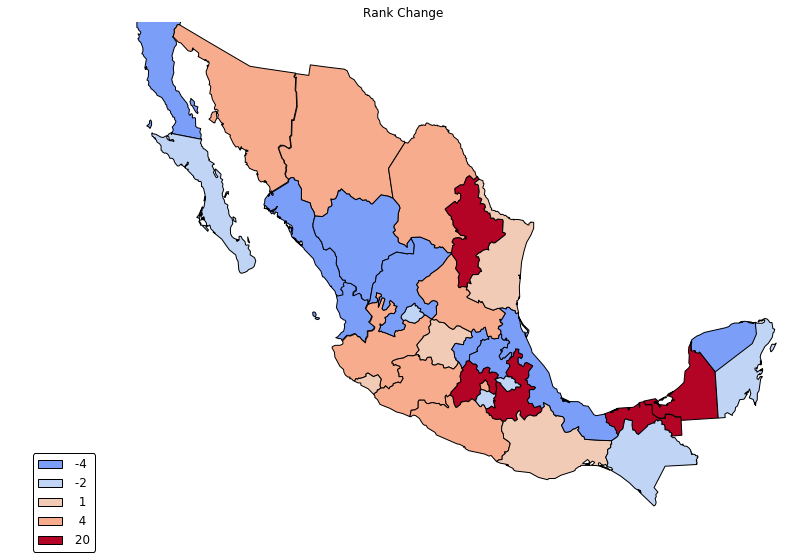

In [33]:
bwr = plt.cm.get_cmap('coolwarm')
bwr(.76)
c5 = [bwr(c) for c in [0.2, 0.4, 0.6, 0.7, 1.0]]

legend =[ "%3d"%ub for ub in bins_epd.bins]
classes = bins_epd.yb
fn = "epd.png"
colors = ['blue', 'cyan', 'white', 'red', 'orange']
choropleth(classes,c5,reader,  legend,title = "Rank Change", fileName=fn, dpi=300)

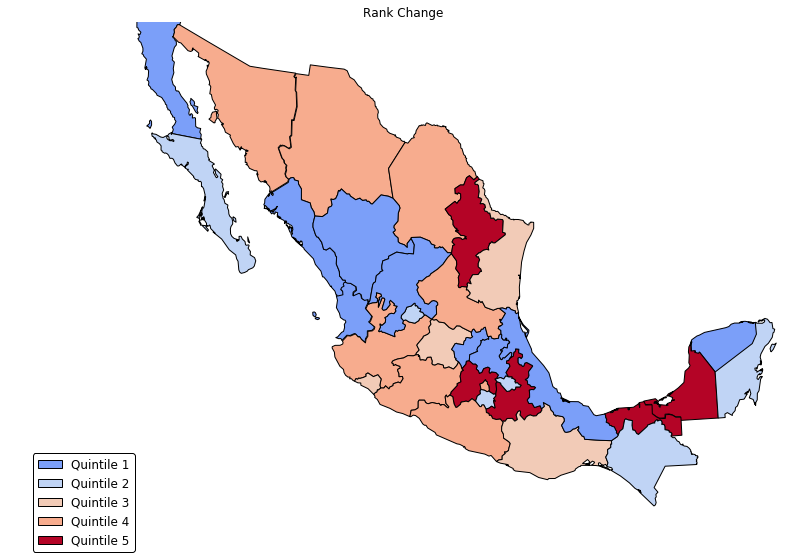

In [34]:
bwr = plt.cm.get_cmap('coolwarm')
bwr(.76)
c5 = [bwr(c) for c in [0.2, 0.4, 0.6, 0.7, 1.0]]

legend =[ "%3d"%ub for ub in bins_epd.bins]
legend = [ "Quintile %d"%d for d in range(1,6)]
classes = bins_epd.yb
fn = "epd_inv.png"
colors = ['blue', 'cyan', 'white', 'red', 'orange']
choropleth(classes,c5,reader,  legend,title = "Rank Change", fileName=fn, dpi=300)

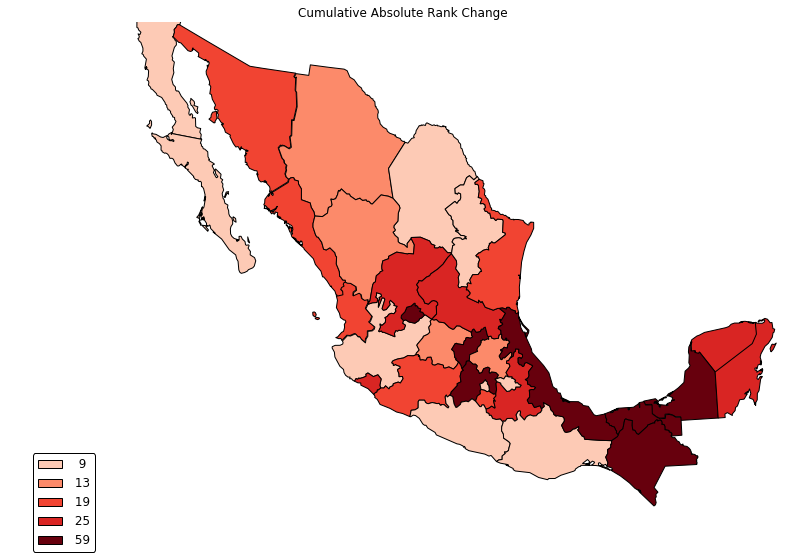

In [35]:
bwr = plt.cm.get_cmap('Reds')
bwr(.76)
c5 = [bwr(c) for c in [0.2, 0.4, 0.6, 0.7, 1.0]]
bins_cumad = ps.Quantiles(cumad, k=5)
legend =[ "%3d"%ub for ub in bins_cumad.bins]
classes = bins_cumad.yb
fn = "cumad.png"
choropleth(classes,c5,reader,  legend,title = "Cumulative Absolute Rank Change", fileName=fn, dpi=300)

In [36]:
np.corrcoef(cumad, epd)

array([[ 1.        ,  0.29577267],
       [ 0.29577267,  1.        ]])

In [37]:
w = ps.queen_from_shapefile(shp_path)

In [38]:
w.transform = 'r'
cumad_i = ps.Moran(cumad, w)
epd_i = ps.Moran(epd, w)

In [39]:
cumad_i.p_sim

0.0089999999999999993

In [40]:
epd_i.p_sim

0.28699999999999998

In [41]:
epd_i.I

0.028265792849126187

In [42]:
cumad_i.I

0.32282400898429453

In [43]:
import scipy.stats

In [44]:
cor_cumad_epd = scipy.stats.pearsonr(cumad, epd)

In [45]:
cor_cumad_epd

(0.29577266909395128, 0.10026206965984577)